In [0]:
import torch
import torch.nn as nn

In [0]:
n_in,n_hid,n_out,bathch_size=10,5,1,10

In [0]:
model = nn.Sequential(nn.Linear(6,8),
                     nn.Sigmoid(),
                     nn.Linear(8,15),
                     nn.Tanh(),
                     nn.Linear(15,20),
                     nn.ReLU(),
                     nn.Linear(20,10),
                     nn.Softmax())

In [0]:
n_in = 6,
n_h1 = 8,
n_h2 = 15,
n_h3 = 20,
n_out = 10,

class custom_class(nn.Module):
    def __init__(self,n_in,n_h1,n_h2,n_h3,n_out):
        super(custom_class,self).__init__()
        self.model = nn.Sequential(nn.Linear(n_in,n_h1),
                              nn.Sigmoid(),
                              nn.Linear(n_h1,n_h2),
                              nn.Tanh(),
                              nn.Linear(n_h2,n_h3),
                              nn.ReLU(),
                              nn.Linear(n_h3,n_out),
                              nn.Softmax())
 
    def forward(self,x):
        return self.model(x)

#CNN WITH CIFAR10 DATASET IN PYTORCH

In [0]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [0]:
import torchvision

In [3]:
trainset=torchvision.datasets.CIFAR10(root='/content/drive/My Drive',download=True,train=True,transform=torchvision.transforms.ToTensor())

0it [00:00, ?it/s]

100%|█████████▉| 169697280/170498071 [00:12<00:00, 16536782.28it/s]

Extracting /content/drive/My Drive/cifar-10-python.tar.gz to /content/drive/My Drive


In [0]:
classes=('airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck')

In [0]:
trainloader=torch.utils.data.DataLoader(trainset,batch_size=4,shuffle=True)

In [6]:
type(data_iter)

NameError: ignored

In [0]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

In [48]:
a=0
a +=  labels.shape[0]
print(a)

4


In [45]:
print(labels)

tensor([0, 1, 7, 9])


In [0]:
img=images[3]

In [12]:
print(img.shape)

torch.Size([3, 32, 32])


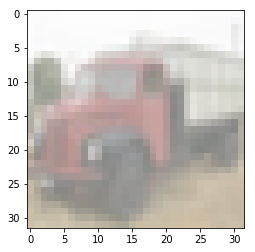

In [13]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
imshow(torchvision.utils.make_grid(img))


#LENET ARCHITECTURE IMPLEMENTATION

In [0]:
class LENET(nn.Module):
  def __init__(self):
    super(LENET,self).__init__()
    self.model=nn.Sequential(nn.Conv2d(3,6,5),
                             nn.Tanh(),
                             nn.AvgPool2d(2,stride=2),
                             nn.Conv2d(6,16,5),
                             nn.Tanh(),
                             nn.AvgPool2d(2, stride=2)
                             )
    self.dense_model=nn.Sequential(nn.Linear(400,120),
                                   nn.Tanh(),
                                   nn.Linear(120,84),
                                   nn.Tanh(),
                                   nn.Linear(84,10),
                                   nn.Softmax()
                                   )
  def forward(self,x):
    y = self.model(x)
    y_flatten = torch.flatten(y,1)
    y = self.dense_model(y_flatten)
    return y


In [86]:
net = LENET()
net.load_state_dict(torch.load("/content/drive/My Drive/hello.pt"))
#model.eval()

<All keys matched successfully>

In [0]:
batch=256

In [88]:
trainst=torchvision.datasets.CIFAR10(root='/content/drive/My Drive',train=True,download=True,transform=torchvision.transforms.ToTensor())
testst = torchvision.datasets.CIFAR10(root='/content/drive/My Drive',train=False,download=True,transform=torchvision.transforms.ToTensor())
trainloder=torch.utils.data.DataLoader(trainst,batch_size=batch,shuffle=True)
testloder = torch.utils.data.DataLoader(testst,batch_size=batch,shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [0]:
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters()) 

In [0]:
def model_evaluation(dataloader): 
  total = 0
  correct = 0
  for data in dataloader:
    image_data,labels = data
    out = net(image_data) 
    max_values,pred_class = torch.max(out,1) 
    total += labels.shape[0] 
    correct += (pred_class == labels).sum().item() 
    accuracy = (100 * correct)/total
  return accuracy

In [91]:
total_epochs = 40

for i in range(total_epochs):
  
  for data in trainloader:
    image_data, labels = data
    
    optimizer.zero_grad() 
    out = net(image_data) #image_data --> input data
    loss = loss_func(out,labels)
    loss.backward()
    optimizer.step()
    
  train_acc = model_evaluation(trainloader) 
  test_acc = model_evaluation(testloder)
  
  print("Epoch :",i," Test Accuracy : ",test_acc," Train Accuracy : ",train_acc)
    

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Epoch : 0  Test Accuracy :  41.42  Train Accuracy :  42.946
Epoch : 1  Test Accuracy :  37.99  Train Accuracy :  39.822
Epoch : 2  Test Accuracy :  42.39  Train Accuracy :  43.72
Epoch : 3  Test Accuracy :  44.05  Train Accuracy :  45.298
Epoch : 4  Test Accuracy :  43.16  Train Accuracy :  44.94
Epoch : 5  Test Accuracy :  45.27  Train Accuracy :  47.334
Epoch : 6  Test Accuracy :  38.96  Train Accuracy :  39.252
Epoch : 7  Test Accuracy :  44.25  Train Accuracy :  45.908
Epoch : 8  Test Accuracy :  42.53  Train Accuracy :  43.634
Epoch : 9  Test Accuracy :  43.29  Train Accuracy :  45.056
Epoch : 10  Test Accuracy :  42.74  Train Accuracy :  43.98
Epoch : 11  Test Accuracy :  44.96  Train Accuracy :  46.85
Epoch : 12  Test Accuracy :  46.03  Train Accuracy :  47.74
Epoch : 13  Test Accuracy :  44.51  Train Accuracy :  45.814
Epoch : 14  Test Accuracy :  40.29  Train Accuracy :  41.442
Epoch : 15  Test Accuracy :  42.02  Train Accuracy :  42.884
Epoch : 16  Test Accuracy :  44.08  Tra

In [0]:
torch.save(net.state_dict(), "/content/drive/My Drive/hello1.pt")

In [55]:
print(correct)

1


In [78]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [81]:
model = LENET(*args, **kwargs)
model.load_state_dict(torch.load("/content/drive/My Drive/hello.pt"))
model.eval()

NameError: ignored

#First Convolutional Neural Network

In [0]:
class firstcnn(nn.Module):
  def __init__(self):
    super(firstcnn,self).__init__()
    self.conv1=nn.Conv2d(3,10,3,padding=(1,1),stride=(1,1))
  def forward(self,x):
    y=self.conv1(x)
    return y

In [0]:
cnn=firstcnn()

In [0]:
print(cnn)

firstcnn(
  (conv1): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
)


In [0]:
out=cnn(images)

In [0]:
print(type(out))

<class 'torch.Tensor'>


In [0]:
print(out.shape)

torch.Size([4, 10, 32, 32])


In [0]:
samples=out[0,7:10,:,:]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


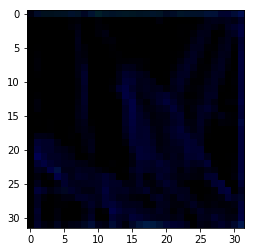

In [0]:
np_image=samples.detach().numpy()
np_image=np.transpose(np_image,(1,2,0))
plt.imshow(np_image)
plt.show()

#Deep Convolutional Network

In [0]:
class deepcnn(nn.Module):
  def __init__(self):
    super(deepcnn,self).__init__()
    self.model=nn.Sequential(nn.Conv2d(3,10,3,padding=(1,1),stride=(1,1)),
                             nn.Conv2d(10,5,3,stride=(2,2),padding=(1,1)))
  def forward(self,x):
    y=self.model(x)
    return y

In [0]:
deepcnn=deepcnn()

In [0]:
deepout=deepcnn(images)

In [0]:
print(deepout.shape)

torch.Size([4, 5, 16, 16])
